In [27]:
import pandas as pd
pd.set_option('display.max_rows',None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import prettytable as pt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import DistanceMetric
from sklearn.neighbors import KNeighborsClassifier
#record all training error rates in this exercise
trainingError = []


In [28]:
#------------------------------------------(a)-----------------------------------------------
#download and import Vertebral Column dataset
data = pd.read_table("column_2C.dat",sep=" ",header= None,names = ['pi','pt','lla','ss','pr','gos','result'])
#set NO=0 and AB=1
data['result'] = data['result'].map({'NO': 0,'AB': 1})



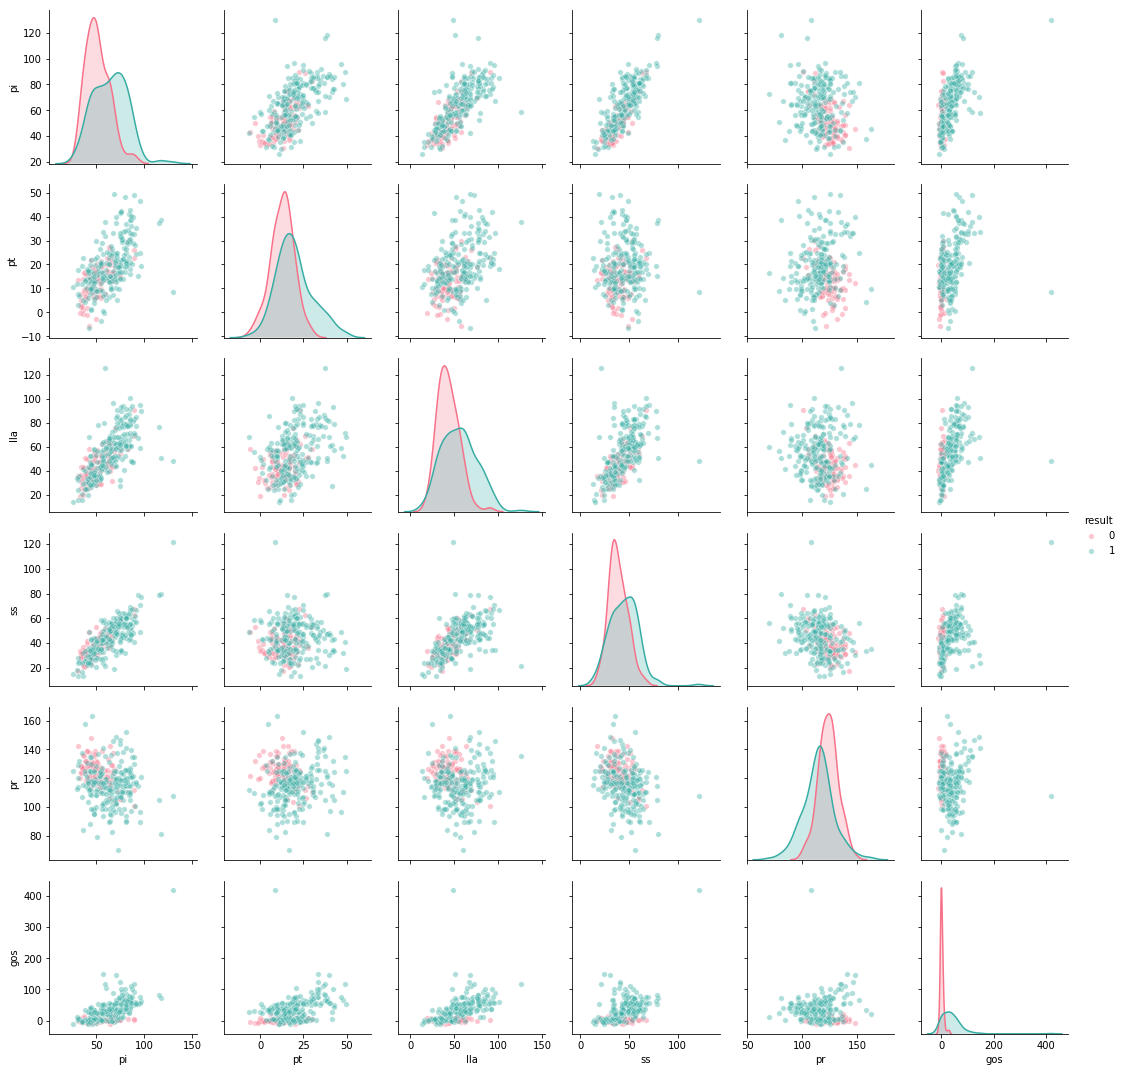

In [29]:
#------------------------------------------(b)---------------------------------------------------- 
#(i)Make scatterplots of the independent variables in the dataset. 
#pink stands for Class 0 and green stands for Class 1.
scatterPlot1 = sns.pairplot(data,hue="result",vars=['pi','pt','lla','ss','pr','gos'],palette="husl",plot_kws={'alpha':0.4,'s':30})


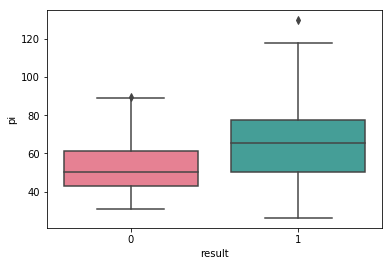

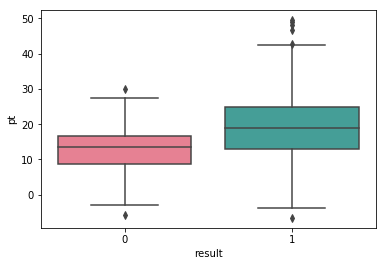

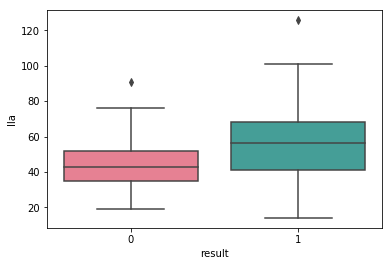

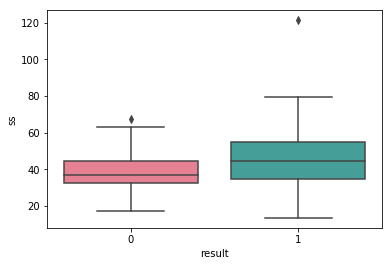

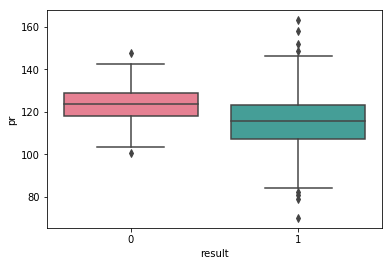

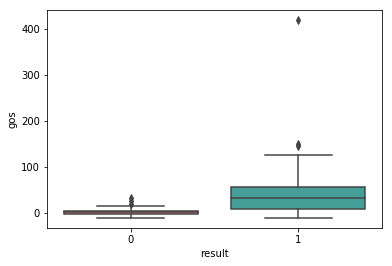

In [30]:
#------------------------------------------(b)---------------------------------------------------- 
#(ii)Make boxplots for each of the independent variables. 
# Pink boxplots shows Class 0 and green boxplots shows 1 

def drawBoxplot(name):
    sns.boxplot(x="result",y=name,data=data,palette="husl")
    
names = ['pi','pt','lla','ss','pr','gos']
for indep in names:
    plt.figure()
    drawBoxplot(indep)

In [31]:
#--------------------------------------------(b)----------------------------------------
#(iii)Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.
#select training data
trainingSet1 = data[data.result.isin(['0'])][0:70]
trainingSet2 = data[data.result.isin(['1'])][0:140]
trainingSet = trainingSet1.append(trainingSet2) #combine training data from different classes together
print(trainingSet)
#select test data
testSet1 = data[data.result.isin(['0'])][70:]
testSet2 = data[data.result.isin(['1'])][140:]
testSet = testSet1.append(testSet2) #combine test data together
print(testSet) 

         pi     pt    lla      ss      pr     gos  result
210   38.51  16.96  35.11   21.54  127.63    7.99       0
211   54.92  18.97  51.60   35.95  125.85    2.00       0
212   44.36   8.95  46.90   35.42  129.22    4.99       0
213   48.32  17.45  48.00   30.87  128.98   -0.91       0
214   45.70  10.66  42.58   35.04  130.18   -3.39       0
215   30.74  13.35  35.90   17.39  142.41   -2.01       0
216   50.91   6.68  30.90   44.24  118.15   -1.06       0
217   38.13   6.56  50.45   31.57  132.11    6.34       0
218   51.62  15.97  35.00   35.66  129.39    1.01       0
219   64.31  26.33  50.96   37.98  106.18    3.12       0
220   44.49  21.79  31.47   22.70  113.78   -0.28       0
221   54.95   5.87  53.00   49.09  126.97   -0.63       0
222   56.10  13.11  62.64   43.00  116.23   31.17       0
223   69.40  18.90  75.97   50.50  103.58   -0.44       0
224   89.83  22.64  90.56   67.20  100.50    3.04       0
225   59.73   7.72  55.34   52.00  125.17    3.24       0
226   63.96  1

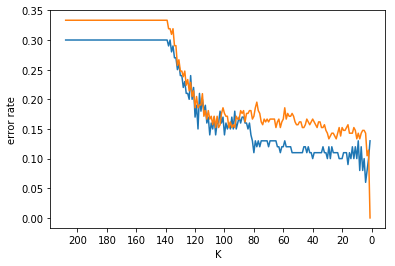

Most suitable k: 4          min test error rate: 0.06 

confusion_matrix
 [[25  5]
 [ 1 69]] 

true positive rate: 0.9857142857142858 true negative rate: 0.8333333333333334 

             precision    recall  f1-score   support

          0       0.96      0.83      0.89        30
          1       0.93      0.99      0.96        70

avg / total       0.94      0.94      0.94       100



In [32]:
#--------------------------------------------(c)----------------------------------------
#(i)Write code for k-nearest neighbors with Euclidean metric (or use a software package).
#code for KNN
def KNNClassify(x_train,y_train,x_test,y_test,k,p):
    knn = KNeighborsClassifier(n_neighbors=k,p=p)
    knn.fit(x_train,y_train)
    y_predict = knn.predict(x_test)
    errorRes = np.nonzero(y_test - y_predict)[0]
    errorRate = len(errorRes) / len(y_test)
    k_errorRate = [k,errorRate]
    return k_errorRate
'''
After testing, normalization did not improve the performance, so still use the data before normalization
def min_max_norm(dataSet):
    max = dataSet.max(axis=0)
    min = dataSet.min(axis=0)
    normData = (dataSet-min)/(max-min)
    return normData
'''

#(ii)Test all the data in the test database with k nearest neighbors. 
x_train = trainingSet.iloc[:,0:6].values.flatten().reshape((210,6))
y_train = trainingSet.iloc[:,-1:].values.flatten()
x_test = testSet.iloc[:,0:6].values.flatten().reshape((100,6))
y_test = testSet.iloc[:,-1:].values.flatten()

#calculate test error
k_testErrors = []
for i in range(1,209,1):
    k_testErrors.append(KNNClassify(x_train,y_train,x_test,y_test,i,2))

#calculatr train error
k_trainErrors = []
for i in range(1,209,1):
    k_trainErrors.append(KNNClassify(x_train,y_train,x_train,y_train,i,2))
sortedTrainErrors = sorted(k_trainErrors,key=lambda x: x[1], reverse=False)[0] 
lowestTrainError = sortedTrainErrors[1]
trainingError.append(lowestTrainError)

#plot train and test errors
fig = plt.figure()
ax = plt.axes()
ax.set_xlabel('K') 
ax.set_ylabel('error rate')
x = [item[0] for item in k_testErrors]
y = [item[1] for item in k_testErrors]
x2 = [item[0] for item in k_trainErrors]
y2 = [item[1] for item in k_trainErrors]
plt.plot(x, y);plt.plot(x2, y2);
plt.xticks(np.arange(0,210,20))
plt.gca().invert_xaxis() 
plt.show()

#find the best k=k*
sortedresult = sorted(k_testErrors,key=lambda x: x[1], reverse=False)[0] 
bestk = sortedresult[0]
print('Most suitable k:',bestk,'         min test error rate:',sortedresult[1],'\n')
knn = KNeighborsClassifier(n_neighbors=bestk,p=2)
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)

#Cal- culate the confusion matrix when k=k*
C=confusion_matrix(y_test,y_predict,labels=[0.0,1.0])
print('confusion_matrix\n',C,'\n')
print('true positive rate:',C[1][1]/(C[1][0]+C[1][1]),'true negative rate:',C[0][0]/(C[0][0]+C[0][1]),'\n')
report = classification_report(y_test,y_predict)
print(report)

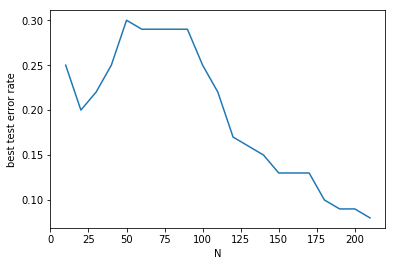

In [33]:
#b(iii) N∈{10,20,30,...,210}, k∈{1,6,11,...,196}
subSetres = []
for N in range(10,211,10):
    result = []
    trainErr = []
    trainDSet0 = normtrainD[normtrainD.result.isin(['0'])][0:int(N/3)] #choose the first ⌊N/3⌋ rows of Class 0
    temp = int(N/3)
    trainDSet1 = normtrainD[normtrainD.result.isin(['1'])][0:int(N-temp)] #choose N − ⌊N/3⌋ rows of Class 1
    trainDSubSet = trainDSet0.append(trainDSet1) #combine subset together
    x_train2 = trainDSubSet.iloc[:,0:6].values.flatten().reshape((N,6))
    y_train2 = trainDSubSet.iloc[:,-1:].values.flatten()
    for i in range(1,N,5): #k is selected from {1,6,11,...,196} and k<N
        result.append(KNNClassify(x_train2,y_train2,x_test,y_test,i,2))
        trainErr.append(KNNClassify(x_train2,y_train2,x_train2,y_train2,i,2))
    sortedresult = sorted(result,key=lambda x: x[1], reverse=False)[0] 
    subSetres.append([N,sortedresult[0],sortedresult[1]])
    sortedTrainErr = sorted(trainErr,key=lambda x: x[1], reverse=False)[0] 
    trainingError.append(sortedTrainErr[1])
    
    
#draw the Learning Curve
LearningCurve = plt.figure()
ax = plt.axes()
ax.set_xlabel('N') 
ax.set_ylabel('best test error rate')
x = [item[0] for item in subSetres]
y = [item[2] for item in subSetres]
ax.plot(x, y);

In [34]:
#-----------------------------(d)--------------------------------
#(i)Minkowski Distance
#A.Manhattan Distance with p = 1.
resultDA = []
trainErr = []
for i in range(1,197,5):
    resultDA.append(classify(x_train,y_train,x_test,y_test,i,1))
    trainErr.append(classify(x_train,y_train,x_train,y_train,i,1))
sortedresultDA = sorted(resultDA,key=lambda x: x[1], reverse=False)[0] 
bestkinDA = sortedresultDA[0]
sortedtrainErr = sorted(trainErr,key=lambda x: x[1], reverse=False)[0] 
trainingError.append(sortedtrainErr[1])
print('Manhattanbestk:',bestkinDA,'Manhattan min error rate:',sortedresultDA[1],'\n')

#B.log10(p) ∈ {0.1,0.2,0.3,...,1}
resultDB = []
trainErr = []
i=0.1
while(i<=1):
    p = pow(10,i)
    resultDB.append([p,classify(x_train,y_train,x_test,y_test,bestkinDA,p)[1]])
    trainErr.append([p,classify(x_train,y_train,x_train,y_train,bestkinDA,p)[1]])
    i = i+0.1
sortedresultDB = sorted(resultDB,key=lambda x: x[1], reverse=False)[0] 
sortedtrainErr = sorted(trainErr,key=lambda x: x[1], reverse=False)[0]
trainingError.append(sortedtrainErr[1])

bestpinDB = sortedresultDB[0]
import math
print('bestlogp:',math.log10(bestpinDB),'min error rate:',sortedresultDB[1],'\n')

#C.Chebyshev Distance with p → ∞
resultDC = []
trainErr = []
for i in range(1,197,5):
    resultDC.append(classify(x_train,y_train,x_test,y_test,i,float('inf') ))
    trainErr.append(classify(x_train,y_train,x_train,y_train,i,float('inf') ))
sortedresultDC = sorted(resultDC,key=lambda x: x[1], reverse=False)[0] 
sortedTrainErr = sorted(trainErr,key=lambda x: x[1], reverse=False)[0] 
trainingError.append(sortedTrainErr[1])

bestkinDC = sortedresultDC[0]
print('Chebyshev best K:',bestkinDC,'Chebyshev min error rate:',sortedresultDC[1],'\n')


#(ii)Mahalanobis Distance
def mahalanobis(x_train,y_train,x_test,y_test,k):
        knn = KNeighborsClassifier(n_neighbors=k,algorithm='brute',metric='mahalanobis',metric_params={'V': np.cov(x_train)})
        knn.fit(x_train,y_train)
        y_predict = knn.predict(x_test)
        error_index = np.nonzero(y_test - y_predict)[0]
        errorRate = len(error_index) / len(y_test)
        re = [k,errorRate]
        return re
    
resultMaha = []
trainErr = []
for i in range(1,197,5):
    resultMaha.append(mahalanobis(x_train,y_train,x_test,y_test,i))
    trainErr.append(mahalanobis(x_train,y_train,x_train,y_train,i))

sortedresultMaha = sorted(resultMaha,key=lambda x: x[1], reverse=False)[0] 
sortedtrainErr = sorted(trainErr,key=lambda x: x[1], reverse=False)[0] 
trainingError.append(sortedtrainErr[1])

bestkinMaha = sortedresultMaha[0]
print('Mahalanobis best k:',bestkinMaha,'Mahalanobis min error rate:',sortedresultMaha[1])

#print results in table
tb = pt.PrettyTable()
tb.field_names = [" ", "k*", "test errors"]
tb.add_row(["Manhattan",bestkinDA,sortedresultDA[1]])
tb.add_row(["log10(p)",bestkinDA,sortedresultDB[1]])
tb.add_row(["Chebyshev",bestkinDC,sortedresultDC[1]])
tb.add_row(["Mahalanobis",bestkinMaha,sortedresultMaha[1]])
print(tb)

Manhattanbestk: 6 Manhattan min error rate: 0.11 

bestlogp: 0.6 min error rate: 0.06 

Chebyshev best K: 16 Chebyshev min error rate: 0.08 

Mahalanobis best k: 6 Mahalanobis min error rate: 0.16
+-------------+----+-------------+
|             | k* | test errors |
+-------------+----+-------------+
|  Manhattan  | 6  |     0.11    |
|   log10(p)  | 6  |     0.06    |
|  Chebyshev  | 16 |     0.08    |
| Mahalanobis | 6  |     0.16    |
+-------------+----+-------------+


In [35]:
#------------------------------------(e)-------------------------------------------
#weighted decision

def knnweighted(x_train,y_train,x_test,y_test,k,p):
        knn = KNeighborsClassifier(n_neighbors=k,weights ='distance',p=p)
        knn.fit(x_train,y_train)
        y_predict = knn.predict(x_test)
        error_index = np.nonzero(y_test - y_predict)[0]
        errorRate = len(error_index) / len(y_test)
        re = [k,errorRate]
        return re


#Euclidean distances 
k_EuclideanErr = []
trainErr = []
for i in range(1,197,5):
    k_EuclideanErr.append(knnweighted(x_train,y_train,x_test,y_test,i,2))
    trainErr.append(knnweighted(x_train,y_train,x_train,y_train,i,2))

sortedeEuclidean = sorted(k_EuclideanErr,key=lambda x: x[1], reverse=False)[0] 
sortedeTrainErr = sorted(trainErr,key=lambda x: x[1], reverse=False)[0]
trainingError.append(sortedeTrainErr[1])
bestk_Euc = sortedeEuclidean[0]
print('bestk(Euc):',bestk_Euc,' min error rate:',sortedeEuclidean[1],'\n')

#Manhattan distances 
k_ManhattanErr = []
trainErr = []

for i in range(1,197,5):
    k_ManhattanErr.append(knnweighted(x_train,y_train,x_test,y_test,i,1))
    trainErr.append(knnweighted(x_train,y_train,x_train,y_train,i,1))

sortedeManhattan = sorted(k_ManhattanErr,key=lambda x: x[1], reverse=False)[0] 
sortedeTrainErr = sorted(trainErr,key=lambda x: x[1], reverse=False)[0]
trainingError.append(sortedeTrainErr[1])
bestk_Man = sortedeManhattan[0]
print('bestk(Man):',bestk_Man,' min error rate:',sortedeManhattan[1],'\n')

#Chebyshev distances 
k_ChebyshevErr  = []
trainErr = []

for i in range(1,197,5):
    k_ChebyshevErr.append(knnweighted(x_train,y_train,x_test,y_test,i,float('inf')))
    trainErr.append(knnweighted(x_train,y_train,x_train,y_train,i,float('inf')))

sortedeChebyshev = sorted(k_ChebyshevErr,key=lambda x: x[1], reverse=False)[0] 
sortedeTrainErr = sorted(trainErr,key=lambda x: x[1], reverse=False)[0]
trainingError.append(sortedeTrainErr[1])

bestk_Che = sortedeChebyshev[0]
print('bestk(Che):',bestk_Che,' error rate:',sortedeChebyshev[1])

bestk(Euc): 6  min error rate: 0.1 

bestk(Man): 26  min error rate: 0.1 

bestk(Che): 16  error rate: 0.11


In [36]:
#--------------------------------------(f)--------------------------------------
#lowest training error rate
lowestTrainErr = sorted(trainingError)
print('lowest training error rate =',lowestTrainErr[0])

lowest training error rate = 0.0
